In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xlrd
list_of_period = [5,10,15,20,25,30]
list_of_k = [1,1.5,2]

In [2]:
# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
closing_prices = []
for row in range(1, sheet.nrows):
    closing_prices.append(sheet.cell_value(row, 4))
    


In [ ]:
def get_avg_std(prices, period):
    avg = np.zeros(len(prices))
    std = np.zeros(len(prices))
    for i in range(period, len(prices)):
        avg[i] = np.mean(prices[i-period:i])
        # sample std
        std[i] = np.std(prices[i-period:i], ddof=1)
    return avg, std



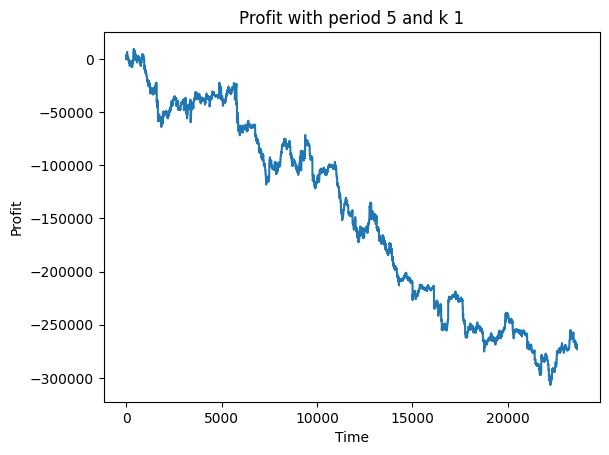

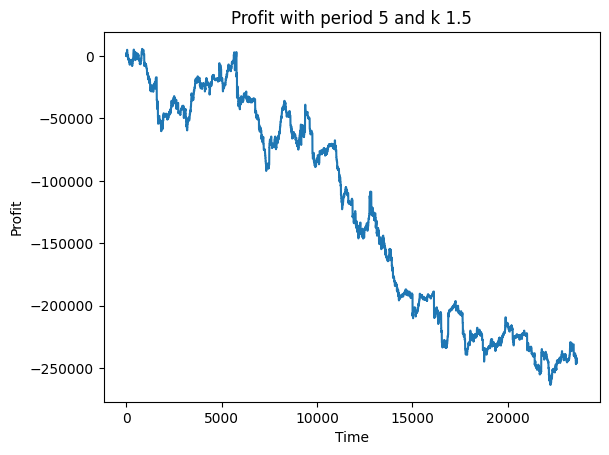

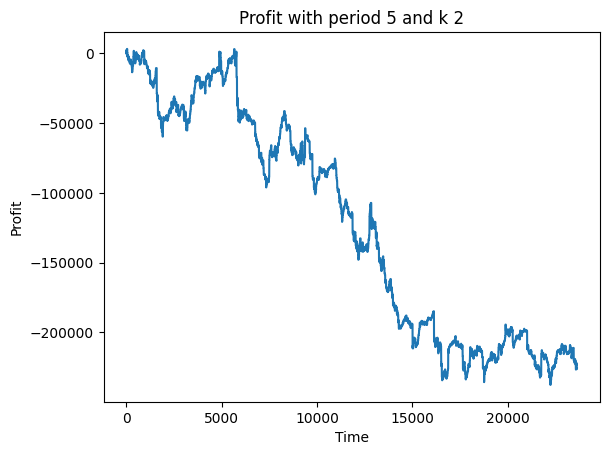

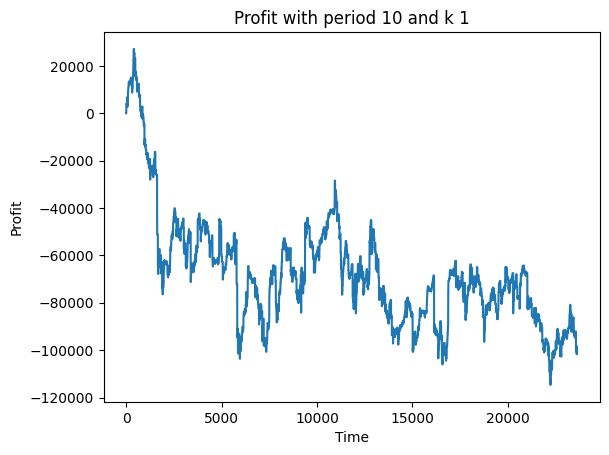

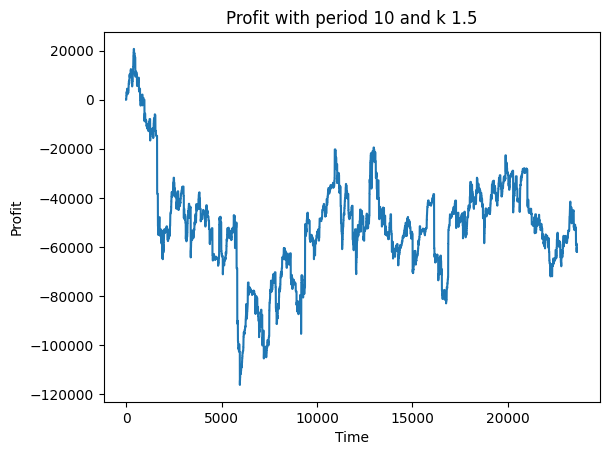

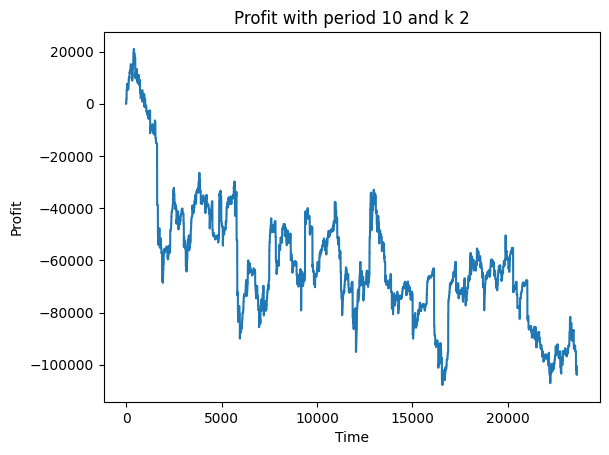

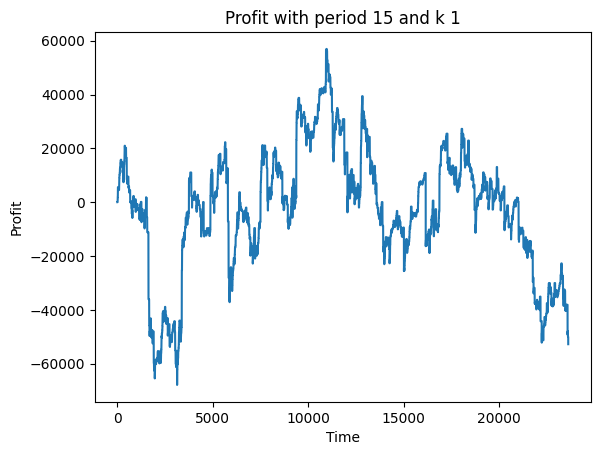

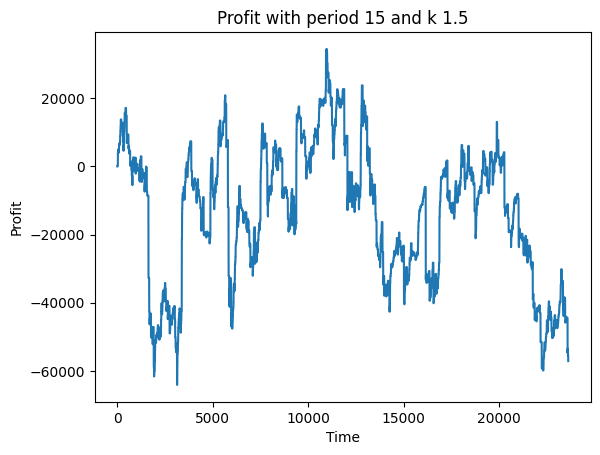

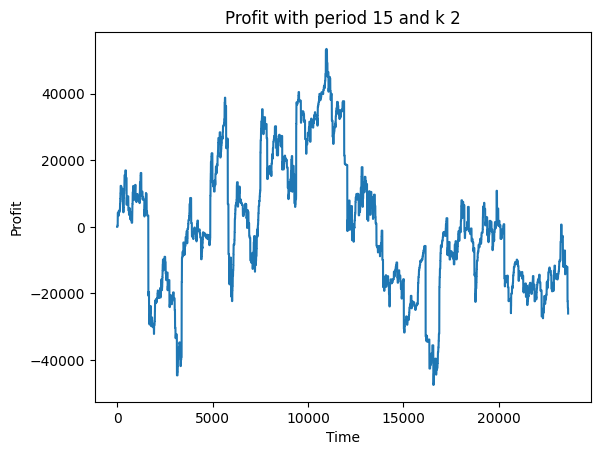

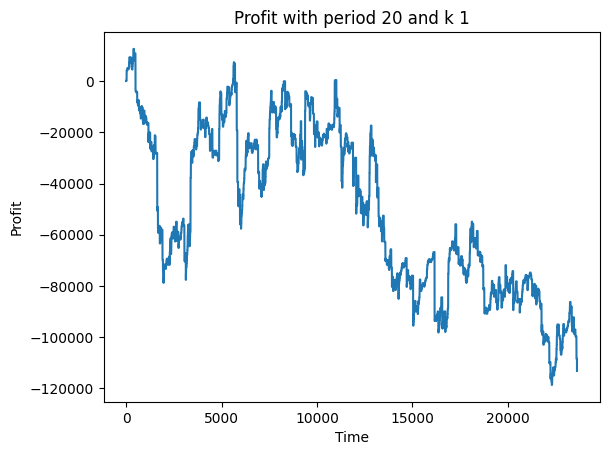

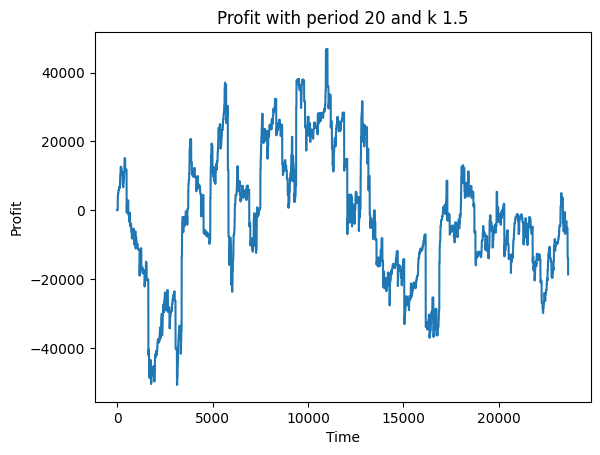

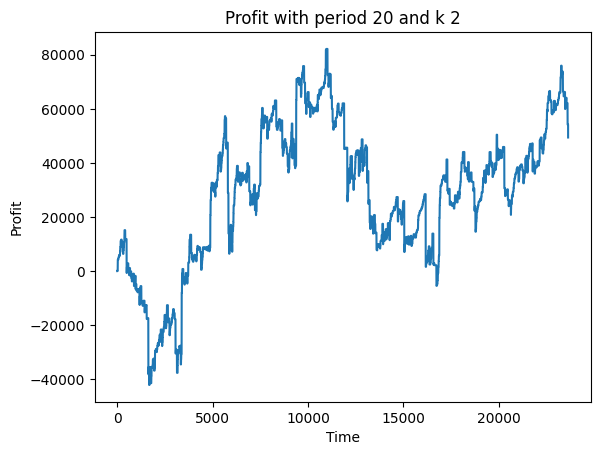

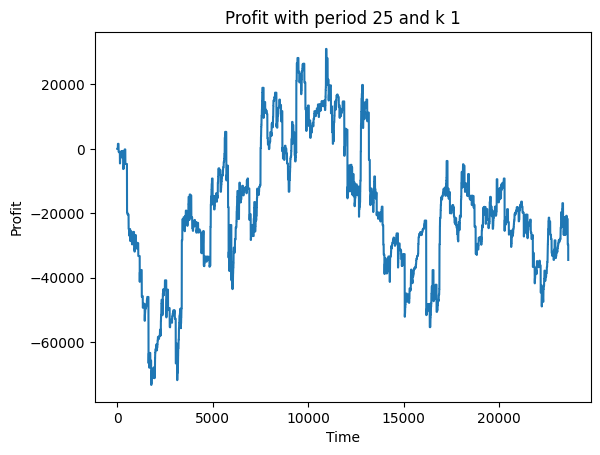

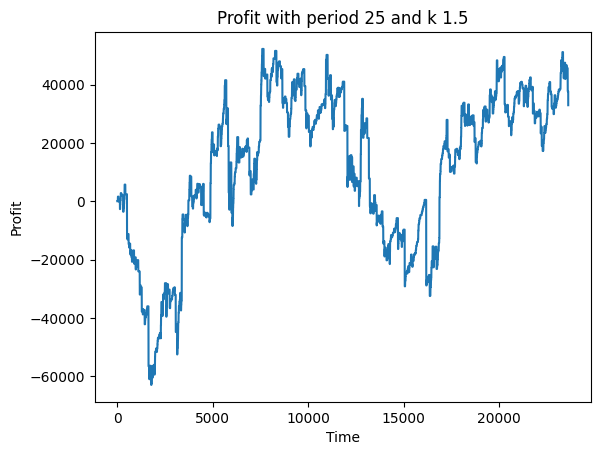

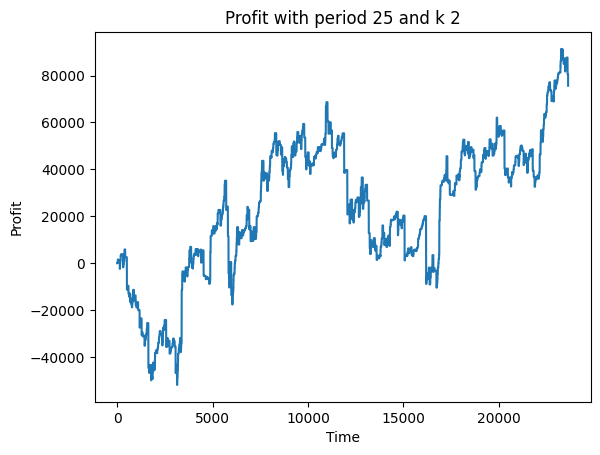

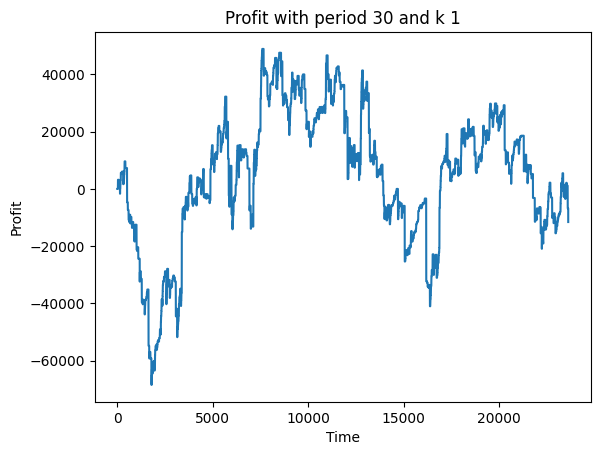

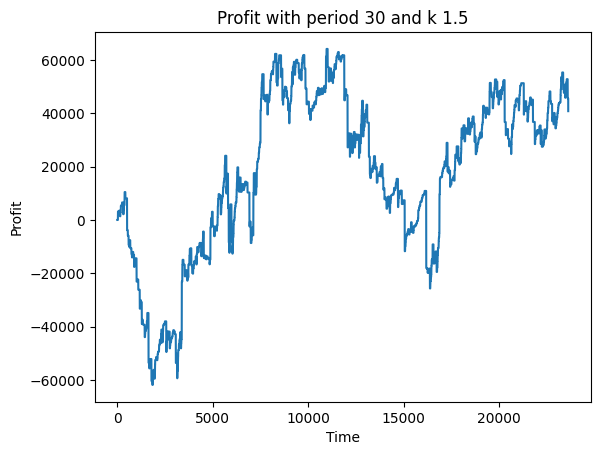

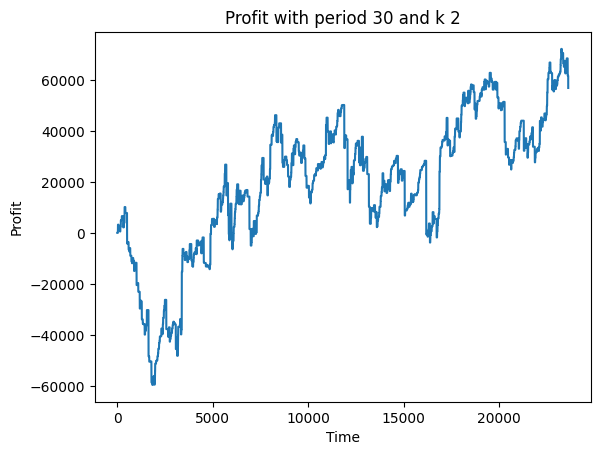

In [9]:
def get_bollinger_bands(prices, period, k):
    avg, std = get_avg_std(prices, period)
    upper_band = avg + k * std
    lower_band = avg - k * std
    return avg, upper_band, lower_band
def profit_basic(prices,avg, upper_band, lower_band):
    flag = 0
    profit = 0
    current_price = 0
    list_of_profit = []
    for i in range(len(prices)):
        if flag == 0:
            if prices[i] < lower_band[i]:
                flag = 1
                current_price = prices[i]
            elif prices[i] > upper_band[i]:
                flag = -1
                current_price = prices[i]
        elif flag == 1:
            if prices[i] > avg[i]:
                flag = 0
                profit += prices[i] - current_price
        elif flag == -1:
            if prices[i] < avg[i]:
                flag = 0
                profit += current_price - prices[i]
        list_of_profit.append(profit)
    if flag == 1:
        profit += prices[-1] - current_price
    elif flag == -1:
        profit += current_price - prices[-1]
    list_of_profit.append(profit)
    return list_of_profit

def plot_profit(list_of_profit, period, k):
    plt.plot(list_of_profit)
    plt.title(f'Profit with period {period} and k {k}')
    plt.xlabel('Time')
    plt.ylabel('Profit')
    plt.show()
for period in list_of_period:
    for k in list_of_k:
        avg, upper_band, lower_band = get_bollinger_bands(closing_prices, period, k)
        list_of_profit = profit_basic(closing_prices, avg, upper_band, lower_band)
        plot_profit(list_of_profit, period, k)
    
    
    